# replay_analysis

detect replay events using tools from nelpy https://github.com/nelpy/nelpy by Etienne Ackermann


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import struct

import nelpy as nel
import nelpy.io
import nelpy.plotting as npl

# assume default aesthetics
npl.setup()

%matplotlib inline

import sys
sys.path.append("D:/ryanh/github/ripple_analyses")
from functions import *

import pandas as pd
import itertools
import statistics 
import math

D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


### load data frames and important paths 

In [2]:
# output files are saved here
save_path = 'F:/Projects/PAE_PlaceCell/analysis/replay_nelpy/'
# where base data will be read in from
data_path = 'F:/Projects/PAE_PlaceCell/ProcessedData/'
# where spike times will be read in
spike_path = 'F:/Projects/PAE_PlaceCell/analysis/spikes/'
# data frame contain info for each unit
df_cell_class = pd.read_csv('F:/Projects/PAE_PlaceCell/analysis/cell_recruitment/processed/pyr_int_df.csv')
# data frame contain info for each population burst event
df_swr = pd.read_csv('F:/Projects/PAE_PlaceCell/analysis/multiunit_data/post_processed/mua_df.csv')

In [166]:
df = pd.read_csv(r'D:\ryanh\github\harvey_et_al_2020\Rdata_pae_lineartrack.csv')
# df.session.nunique()

temp_df = df.groupby('session')['InformationContent'].nunique()
temp_df.index[temp_df.argmax()]



'LEM3124_S20190302163218.mat'

In [167]:
df[df.session == 'LEM3124_S20190302163218.mat']

,InformationContent,Coherence,Sparsity,PeakRate,OverallFiringRate,Field2Wall,FieldWidth,nfields,nSpikes,mean_vector_length,...,corrected_dic,corrected_info_content,corrected_sparsity,correction_fit,runningdir,session,tt,cell,area,group
594,0.326531,2.029912,0.729185,4.931216,2.052788,54,69,1,353,0.221881,...,NaN,NaN,NaN,NaN,1,LEM3124_S20190302163218.mat,TT1.mat,1,ca1,pae
595,1.109156,3.147364,0.560387,15.743663,5.916009,57,78,1,660,0.588977,...,NaN,NaN,NaN,NaN,1,LEM3124_S20190302163218.mat,TT1.mat,13,ca1,pae
596,0.879109,2.567761,0.611274,2.997111,1.123578,48,66,1,134,0.634977,...,NaN,NaN,NaN,NaN,1,LEM3124_S20190302163218.mat,TT1.mat,16,ca1,pae
597,0.219579,1.859516,0.759617,12.246166,5.418799,18,39,2,1266,0.253911,...,NaN,NaN,NaN,NaN,1,LEM3124_S20190302163218.mat,TT1.mat,18,ca1,pae
598,0.211699,2.121052,0.744724,2.139922,0.753181,21,36,1,142,0.200148,...,NaN,NaN,NaN,NaN,1,LEM3124_S20190302163218.mat,TT10.mat,2,ca1,pae
599,0.275288,2.101615,0.684547,3.197152,1.180861,36,72,1,205,0.189749,...,NaN,NaN,NaN,NaN,1,LEM3124_S20190302163218.mat,TT10.mat,6,ca1,pae
600,1.185642,3.350067,0.445440,8.795165,2.491499,51,54,1,301,0.707413,...,NaN,NaN,NaN,NaN,1,LEM3124_S20190302163218.mat,TT10.mat,11,ca1,pae
601,0.640192,2.706589,0.497217,9.593880,2.616417,24,48,1,441,0.256765,...,NaN,NaN,NaN,NaN,1,LEM3124_S20190302163218.mat,TT11.mat,4,ca1,pae
602,1.462042,2.906398,0.262911,7.020564,1.194206,24,39,1,218,0.829664,...,NaN,NaN,NaN,NaN,1,LEM3124_S20190302163218.mat,TT11.mat,6,ca1,pae
603,0.454707,2.481276,0.492328,13.133575,3.641533,18,30,2,927,0.188114,...,NaN,NaN,NaN,NaN,1,LEM3124_S20190302163218.mat,TT11.mat,9,ca1,pae


In [ ]:
# data_path = 'F:\\Projects\\PAE_PlaceCell\\ProcessedData\\'
# dicts = {}
# for session in df.session:
#     f = h5py.File(data_path+session+'.mat','r')
#     ex_ep = []
#     for i in range(f['events'].shape[0]):
#         ex_ep.append(f['events'][i])
#     dicts[session] = ex_ep
    
# ep_type = ['pedestal_1','track','pedestal_2','cylinder_1','pedestal_3','cylinder_2','pedestal_4']
# df['ep_type'] = np.ones_like(df.session)
# # session_df=pd.DataFrame()
# for session in np.unique(df.session):
#     # stack epoch times
#     b = np.hstack(dicts[session])
    
#     # add 0 to start to indicate the start of the recording session
#     b = np.insert(b,0,0)
    
#     # add the ts of the last ripple of the session to indicate end of session
#     b = list(b)
#     last_rip = max(df.end_time[df.session == session])
#     if b[-1] < last_rip:
#         b.append(last_rip)
    
#     # loop through each epoch and label each ripple
#     for ep in range(len(b)-1):
#         idx = (df.session == session) & (df.peak_time >= b[ep]) & (df.peak_time <= b[ep+1])
#         df['ep_type'][idx] = ep_type[ep]

# df

In [ ]:
# b = get_epochs(os.path.join(data_path,session)+'.mat')
# print(b)
# b = np.insert(b,0,0)
# # add the ts of the last spike of the session to indicate end of session
# spikes_ = list(itertools.chain(*spikes))
# # b.append(max(spikes_))
# # b
# print(b)
# b = np.insert(b,len(b),max(spikes_))
# print(b)

# ep_type = ['pedestal_1','track','pedestal_2','cylinder_1','pedestal_3','cylinder_2','pedestal_4']

# for ep in range(len(b)-1):
#         idx = (df.session == session) & (df.peak_time >= b[ep]) & (df.peak_time <= b[ep+1])
#         df['ep_type'][idx] = ep_type[ep]

### helper functions

In [137]:
def get_epochs(path):
    f = h5py.File(path,'r')
    ex_ep = []
    for i in range(f['events'].shape[0]):
        ex_ep.append(f['events'][i])
    return ex_ep

def get_maze_size_cm(path):
    f = h5py.File(path,'r')
    maze_size_cm = []
    for i in range(f['maze_size_cm'].shape[0]):
        maze_size_cm.append(f['maze_size_cm'][i][0])
    return maze_size_cm  

# def get_mazetypes(path):
#     f = h5py.File(path,'r')
#     mazetypes = []
#     for i in range(f['mazetypes'].shape[0]):
#         mazetypes.append(f['mazetypes'][i][0])
#     return mazetypes  

# def get_mazetypes(path):
#     f = h5py.File(path,'r')
#     return f['mazetypes'][()].tobytes()[::2].decode()

def rescale(x,new_min,new_max):
    return ((x - min(x)) / (max(x) - min(x))) * ((new_max-new_min) + new_min)

def rescale_coords(df,session_epochs,maze_size_cm):
    for i,val in enumerate(session_epochs.data):
        temp_df = df[df['ts'].between(val[0],val[1])]
        
        x_range = max(temp_df.x) - min(temp_df.x)
        y_range = max(temp_df.y) - min(temp_df.y)
        x_y_ratio = x_range/y_range
        # if the ratio of x to y is > 5, it is probably a linear track
        if x_y_ratio > 5:
            df.loc[df['ts'].between(val[0],val[1]),'x'] = rescale(temp_df.x,0,maze_size_cm[i])
            df.loc[df['ts'].between(val[0],val[1]),'y'] = rescale(temp_df.y,0,maze_size_cm[i]/x_y_ratio)
        else:
            df.loc[df['ts'].between(val[0],val[1]),'x'] = rescale(temp_df.x,0,maze_size_cm[i])
            df.loc[df['ts'].between(val[0],val[1]),'y'] = rescale(temp_df.y,0,maze_size_cm[i])
    return df

def get_tuning_curves(pos,st,ep,sigma=3):
    cur_pos = nel.AnalogSignalArray(pos[ep].ydata, timestamps=pos[ep].time, support=pos[ep].support, fs=1/statistics.mode(np.diff(df.ts)))

    sigma_100ms = 0.1
    # compute and smooth speed
    speed1 = nel.utils.ddt_asa(cur_pos, smooth=True, sigma=sigma_100ms, norm=True)

    # find epochs where the animal ran
    run_epochs = nel.utils.get_run_epochs(speed1, v1=4, v2=4)

    st_run = st[run_epochs] # restrict spike trains to those epochs during which the animal was running
    ds_run = 0.5 
#     ds_run = 0.1

    ds_50ms = 0.05
    # smooth and re-bin:
#     sigma = 0.3 # 300 ms spike smoothing
#     bst_run = st_run.bin(ds=0.1).smooth(sigma=0.3 , inplace=True)
    bst_run = st_run.bin(ds=ds_50ms).smooth(sigma=0.3 , inplace=True).rebin(w=ds_run/ds_50ms)

#     sigma = 3 # smoothing std dev in cm
    tc2d = nel.TuningCurve2D(bst=bst_run,
                             extern=cur_pos, 
                             ext_nx=int(math.ceil(np.nanmax(cur_pos.ydata[0,:]))/3), 
                             ext_ny=int(math.ceil(np.nanmax(cur_pos.ydata[1,:]))/3), 
                             ext_xmin=0, 
                             ext_xmax=math.ceil(np.nanmax(cur_pos.ydata[0,:])), 
                             ext_ymin=0, 
                             ext_ymax=math.ceil(np.nanmax(cur_pos.ydata[1,:])), 
                             sigma=sigma, 
                             min_duration=0)
    return tc2d, bst_run

In [84]:
0.05 * (0.1/0.05)

0.1

In [ ]:
from sklearn.linear_model import LinearRegression
tc2d = get_tuning_curves(pos,st,0)
posteriors, lengths, mode_pth, mean_pth = nel.decoding.decode2D(bst_run, tc2d)
plt.figure(figsize=(4,4))
plt.plot(actual_pos[0,:],mode_pth[0,:], '.k', label='actual')

plt.figure(figsize=(4,4))
plt.plot(actual_pos[1,:],mode_pth[1,:], '.k', label='actual')

reg = LinearRegression().fit(actual_pos[0,:], mode_pth[0,:])
print(reg.score(actual_pos[0,:], mode_pth[0,:]))

plt.figure(figsize=(25,3))
actual_pos = pos[0](bst_run.bin_centers)
plt.plot(actual_pos[0,:], c='grey', label='actual')
plt.ylabel('position (% along track)')
plt.xlabel('time bin (concatenated)')
plt.plot(mode_pth[0,:], c='0.2', label='decoded using sorted units')
plt.legend()
plt.show()

In [54]:
from sklearn.linear_model import LinearRegression


In [ ]:
r2 = []
ep = 0
for i in np.arange(0,5,0.25):
    
    tc2d,bst_run = get_tuning_curves(pos,st,ep,sigma=i)
    posteriors, lengths, mode_pth, mean_pth = nel.decoding.decode2D(bst_run, tc2d)
    actual_pos = pos[ep](bst_run.bin_centers)

    x = actual_pos[0,:].reshape(-1, 1)
    y = mode_pth[0,:].reshape(-1, 1)
    reg = LinearRegression().fit(x,y)
    r2.append(reg.score(x,y))
    
   

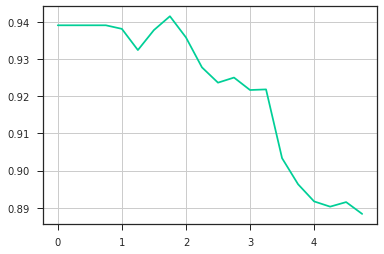

In [177]:
plt.plot(np.arange(0,5,0.25),r2)
plt.grid() 


D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_eventarray.py:1765: UserWarning: interval duration is less than bin size: ignoring...
D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_eventarray.py:478: UserWarning: series tags have not yet been specified
D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support


0.941486055691677
0.4702957550017143


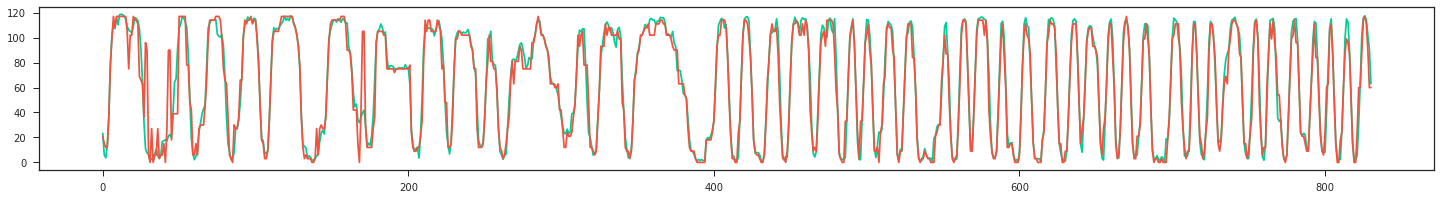

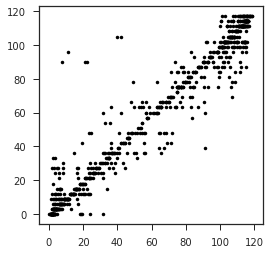

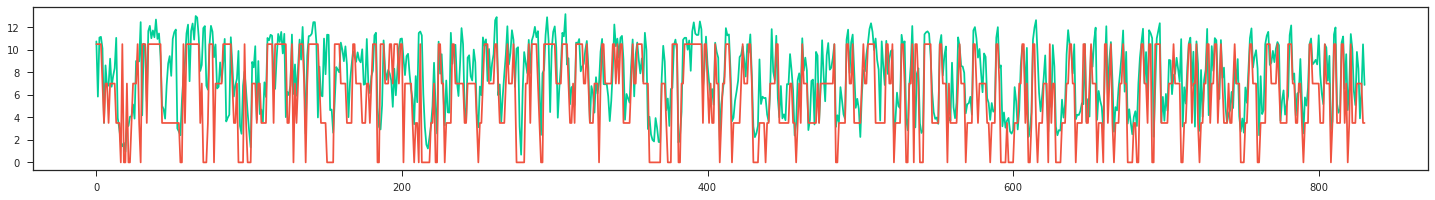

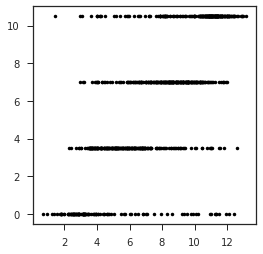

In [178]:
tc2d,bst_run = get_tuning_curves(pos,st,ep,sigma=1.75)
posteriors, lengths, mode_pth, mean_pth = nel.decoding.decode2D(bst_run, tc2d)
actual_pos = pos[ep](bst_run.bin_centers)

x = actual_pos[0,:].reshape(-1, 1)
y = mode_pth[0,:].reshape(-1, 1)

plt.figure(figsize=(25,3))
plt.plot(x)
plt.plot(y)

plt.figure(figsize=(4,4))
plt.plot(x,y,'.k')

reg = LinearRegression().fit(x,y)
print(reg.score(x,y))


x = actual_pos[1,:].reshape(-1, 1)
y = mode_pth[1,:].reshape(-1, 1)

plt.figure(figsize=(25,3))
plt.plot(x)
plt.plot(y)

plt.figure(figsize=(4,4))
plt.plot(x,y,'.k')

reg = LinearRegression().fit(x,y)
print(reg.score(x,y))

In [174]:
tc2d

<TuningCurve2D at 0x21f90e591c0> with shape (95, 40, 4)

D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_eventarray.py:1765: UserWarning: interval duration is less than bin size: ignoring...
D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_eventarray.py:478: UserWarning: series tags have not yet been specified


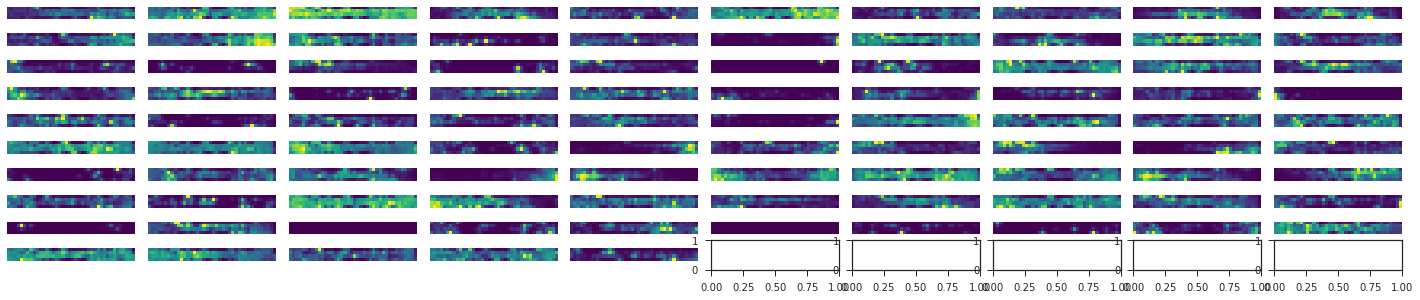

In [182]:
tc2d,bst_run = get_tuning_curves(pos,st,ep,sigma=1.75)


fig, axs = plt.subplots(math.ceil(np.sqrt(tc2d.n_units)),math.ceil(np.sqrt(tc2d.n_units)), figsize=(25, 5), edgecolor='k')
fig.subplots_adjust(hspace = -0.1, wspace=0.1)
axs = axs.ravel()

for unit_id in range(tc2d.n_units):
    axs[unit_id].matshow(tc2d.ratemap[unit_id].T, cmap=plt.cm.viridis)
    axs[unit_id].axis('off')

In [ ]:
# i = 0
# cur_pos = nel.AnalogSignalArray(pos[i].ydata, timestamps=pos[i].time, support=pos[i].support, fs=1/statistics.mode(np.diff(df.ts)))
# sigma_100ms = 0.1
# # compute and smooth speed
# speed1 = nel.utils.ddt_asa(cur_pos, smooth=True, sigma=sigma_100ms, norm=True)

# # find epochs where the animal ran
# run_epochs = nel.utils.get_run_epochs(speed1, v1=3, v2=3)

# st_run = st[run_epochs] # restrict spike trains to those epochs during which the animal was running
# ds_run = 0.5 
# ds_50ms = 0.05
# # smooth and re-bin:
# sigma = 0.3 # 300 ms spike smoothing
# bst_run = st_run.bin(ds=ds_50ms).smooth(sigma=sigma, inplace=True).rebin(w=ds_run/ds_50ms)


# tc2d = nel.TuningCurve2D(bst=bst_run,
#                          extern=cur_pos, 
#                          ext_nx=int(math.ceil(np.nanmax(cur_pos.ydata[0,:]))/3), 
#                          ext_ny=int(math.ceil(np.nanmax(cur_pos.ydata[1,:]))/3), 
#                          ext_xmin=0, 
#                          ext_xmax=math.ceil(np.nanmax(cur_pos.ydata[0,:])), 
#                          ext_ymin=0, 
#                          ext_ymax=math.ceil(np.nanmax(cur_pos.ydata[1,:])), 
#                          sigma=sigma, 
#                          min_duration=0)

# plt.matshow(tc2d.occupancy.T, cmap=plt.cm.Spectral_r)
# plt.gca().invert_yaxis()

In [ ]:
# unit_id = 20


# plt.figure()
# plt.matshow(tc2d.ratemap[unit_id].T, cmap=plt.cm.Spectral_r)
# plt.gca().invert_yaxis()


# plt.figure(figsize=(15.9,3))
# ax = npl.plot2d(cur_pos, lw=0.5, c='0.8')
# at = st.loc[:,unit_id+1][cur_pos.support].time[0]
# _, pos_at_spikes = pos.asarray(at=at)
# ax.plot(pos_at_spikes[0,:], pos_at_spikes[1,:], 'o', alpha=0.5, color=npl.colors.sweet.red)
# ax.set_aspect('equal')
# ax.set_title('unit {}'.format(unit_id), y=1.03)
# plt.autoscale(enable=True, axis='x', tight=True)

In [ ]:
plt.figure(figsize=(25,4))


posteriors, lengths, mode_pth, mean_pth = nel.decoding.decode2D(bst_run, tc2d)
actual_pos = cur_pos(bst_run.bin_centers)
plt.plot(actual_pos[0,:],actual_pos[1,:], c='grey', label='actual')

plt.ylabel('position (% along track)')
plt.xlabel('time bin (concatenated)')

plt.figure(figsize=(25,4))

plt.plot(mean_pth[0,:],mean_pth[1,:], c='0.2', label='decoded using sorted units')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(25,4))
posteriors, lengths, mode_pth, mean_pth = nel.decoding.decode2D(bst_run, tc2d)
actual_pos = cur_pos(bst_run.bin_centers)
plt.plot(actual_pos[0,:], c='grey', label='actual')

plt.ylabel('position (% along track)')
plt.xlabel('time bin (concatenated)')
plt.plot(mode_pth[0,:], c='0.2', label='decoded using sorted units')
plt.legend()
plt.show()

plt.figure(figsize=(25,4))
posteriors, lengths, mode_pth, mean_pth = nel.decoding.decode2D(bst_run, tc2d)
actual_pos = cur_pos(bst_run.bin_centers)
plt.plot(actual_pos[1,:], c='grey', label='actual')

plt.ylabel('position (% along track)')
plt.xlabel('time bin (concatenated)')
plt.plot(mode_pth[1,:], c='0.2', label='decoded using sorted units')
plt.legend()
plt.show()

plt.figure(figsize=(4,4))
plt.plot(actual_pos[0,:],mode_pth[0,:], '.k', label='actual')


In [202]:
# get data session path from mat file
path = get_session_path(os.path.join(data_path,session)+'.mat')

# load position data from .mat file
df = load_position(os.path.join(data_path,session)+'.mat')
# get the size of each maze
maze_size_cm = get_maze_size_cm(os.path.join(data_path,session)+'.mat')
# get session epochs
session_epochs = nel.EpochArray(get_epochs(os.path.join(data_path,session)+'.mat'))
# rescale epoch coordinates into cm
df = rescale_coords(df,session_epochs,maze_size_cm)

# put position into object
pos = nel.AnalogSignalArray(timestamps=df.ts,
                        data=[df.x, df.y],
                        fs=1/statistics.mode(np.diff(df.ts)),
                        support=(session_epochs))

spikes = np.load(os.path.join(spike_path,session)+'.npy',allow_pickle=True)
spikes_ = list(itertools.chain(*spikes))
session_bounds = nel.EpochArray([min(spikes_),max(spikes_)])

# only include pyramidal units that have > 100 spikes
unit_ids_to_keep = ((df_cell_class[df_cell_class.session == session].cell_type == "pyr") &
                    (df_cell_class[df_cell_class.session == session].n_spikes > 100))
spikes = spikes[unit_ids_to_keep]
st = nel.SpikeTrainArray(timestamps=spikes,support=session_bounds, fs=32000)
    
    

for i,ep in enumerate(session_epochs):
#     i = 1
    tc2d,bst_run = get_tuning_curves(pos,st,i,sigma=1.75)
    PBEs = nel.EpochArray([np.array([df_swr[df_swr.session == session].start_time,df_swr[df_swr.session == session].end_time]).T])
    # restrict to current epoch
    PBEs = PBEs[session_epochs[i]]

    bst_placecells = st[PBEs].bin(ds=0.02)
    x_max = math.ceil(np.nanmax(pos[i].ydata[0,:]))
    y_max = math.ceil(np.nanmax(pos[i].ydata[1,:]))

    for rip_n in range(bst_placecells.n_intervals):
        posteriors, lengths, mode_pth, mean_pth = nel.decoding.decode2D(bst_placecells[rip_n], tc2d, xmin=0, xmax=x_max, ymin=0, ymax=y_max)



D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_eventarray.py:709: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
D:\ryanh\Anaconda3\envs\replay\lib\site-packages\nelpy\core\_eventarray.py:478: UserWarning: series tags have not yet been specified


In [268]:
from scipy import stats
def linregress_bst(bst, tuningcurve, x_max, y_max):

    posterior, bdries, mode_pth, mean_pth =  nel.decoding.decode2D(bst_placecells, tc2d, xmin=0, xmax=x_max, ymin=0, ymax=y_max)
    
    slopes = np.zeros(bst.n_epochs)
    intercepts = np.zeros(bst.n_epochs)
    r2values = np.zeros(bst.n_epochs)
    for idx in range(bst.n_epochs):
        x = mode_pth[0,bdries[idx]:bdries[idx+1]]
        y = mode_pth[1,bdries[idx]:bdries[idx+1]]
        x = x[~np.isnan(y)]
        y = y[~np.isnan(y)]

        if len(y) > 2:
            slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
            slopes[idx] = slope
            intercepts[idx] = intercept
            r2values[idx] = rvalue**2
        else:
            slopes[idx] = np.nan
            intercepts[idx] = np.nan
            r2values[idx] = np.nan #
#     if bst.n_epochs == 1:
#         return np.asscalar(slopes), np.asscalar(intercepts), np.asscalar(r2values)
    return slopes, intercepts, r2values




In [266]:
posteriors.shape

(25, 25, 703)

In [269]:
posteriors, lengths, mode_pth, mean_pth = nel.decoding.decode2D(bst_placecells, tc2d, xmin=0, xmax=x_max, ymin=0, ymax=y_max)

slopes, intercepts, r2values = linregress_bst(bst_placecells, tc2d, x_max, y_max)


ValueError: too many values to unpack (expected 2)

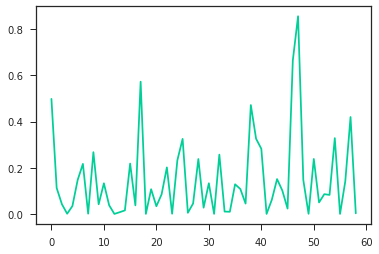

In [257]:
plt.plot(r2values)

In [ ]:
# i=0
# tc2d,_ = get_tuning_curves(pos,st,i,sigma=1.75)
# PBEs = nel.EpochArray([np.array([df_swr[df_swr.session == session].start_time,df_swr[df_swr.session == session].end_time]).T],support=session_epochs[i])
# bst_placecells = st[PBEs].bin(ds=0.02)

# posterior, cum_posterior_lengths, mode_pth, mean_pth =  nel.decoding.decode2d(bst_placecells, tc2d)
x_max = math.ceil(np.nanmax(pos[i].ydata[0,:]))
y_max = math.ceil(np.nanmax(pos[i].ydata[1,:]))

for rip_n in range(bst_placecells.n_intervals):
    posteriors, lengths, mode_pth, mean_pth = nel.decoding.decode2D(bst_placecells[rip_n], tc2d, xmin=0, xmax=x_max, ymin=0, ymax=y_max)

    plt.figure(figsize=(x_max/7,y_max/7))
    ax = npl.plot2d(pos[i], lw=0.5, c='0.7')
    ax.plot(mode_pth[0,:], mode_pth[1,:], 'o', color='0.3', markersize=6)
    npl.colorline(mode_pth[0,:], mode_pth[1,:], ax=ax, cmap=plt.cm.magma, lw=3, cm_range=(0,1))
    plt.plot(pos[PBEs[rip_n]].data[0,:],pos[PBEs[rip_n]].data[1,:],"v",markersize=20)

In [ ]:

for t in range(posteriors.shape[2]):
    with npl.FigureManager(show=True, figsize=(x_max/7,y_max/7)) as (fig, ax):
        npl.imagesc(x=np.arange(x_max), y=np.arange(y_max), data=posteriors[:,:,t], cmap=plt.cm.bone_r, ax=ax)
        ax.plot(mode_pth[0,t],mode_pth[1,t],'.r')
        ax.plot(mean_pth[0,t],mean_pth[1,t],'.g')

In [ ]:
def run_all(session,data_path,spike_path,save_path,df_swr,df_cell_class):
    # get data session path from mat file
    path = get_session_path(os.path.join(data_path,session)+'.mat')

    # load position data from .mat file
    df = load_position(os.path.join(data_path,session)+'.mat')
    # get the size of each maze
    maze_size_cm = get_maze_size_cm(os.path.join(data_path,session)+'.mat')
    # get session epochs
    session_epochs = nel.EpochArray(get_epochs(os.path.join(data_path,session)+'.mat'))
    # rescale epoch coordinates into cm
    df = rescale_coords(df,session_epochs,maze_size_cm)
    # put position into object
    pos = nel.AnalogSignalArray(timestamps=df.ts,
                            data=[df.x, df.y],
                            fs=1/statistics.mode(np.diff(df.ts)),
                            support=(session_epochs))
    
    # load spikes & add to object
    spikes = np.load(os.path.join(spike_path,session)+'.npy',allow_pickle=True)
    spikes_ = list(itertools.chain(*spikes))
    session_bounds = nel.EpochArray([min(spikes_),max(spikes_)])
    st = nel.SpikeTrainArray(timestamps=spikes,support=session_bounds, fs=32000)

    # loop through each epoch 
    for i,ep in enumerate(session_epochs):
        tc2d = get_tuning_curves(pos,st,i)
        PBEs = nel.EpochArray([np.array([df_swr[df_swr.session == session].start_time,df_swr[df_swr.session == session].end_time]).T])

def main_loop(session,data_path,spike_path,save_path,df_swr,df_cell_class):
    base = os.path.basename(session)
    os.path.splitext(base)
    save_file = save_path + os.path.splitext(base)[0] + '.pkl'
    
    # check if saved file exists
    if os.path.exists(save_file):
        return
        
    # detect ripples and calc some features
    results = run_all(session,data_path,spike_path,save_path,df_swr,df_cell_class)   

    # save file
    with open(save_file, 'wb') as f:
        pickle.dump(results, f)


# find sessions to run
sessions = pd.unique(df_swr.session)

# for session in sessions:
#     print(session)
#     main_loop(session,data_path,spike_path,save_path,df_swr,df_cell_class)
 
num_cores = multiprocessing.cpu_count()         
processed_list = Parallel(n_jobs=num_cores)(delayed(main_loop)(session,data_path,spike_path,save_path,df_swr,df_cell_class) for session in sessions)

In [168]:
sessions = pd.unique(df_swr.session)

session = 'LEM3124_S20190302163218'